# Problem Statement
To predict the satisfied and unsatisfied customer of the Santander bank.

# Context
For the dataset we are given, each row represents a customer. We are given train datasets  with 371. Train dataset has an extra column called ’TARGET’ , ‘TARGET’ column show’s customer’s satisfaction. Value ‘0’ in TARGET column means the customer is satisfied, value ‘1’ means customer is unsatisfied

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [ ]:
# Labels present in the dataset
LABELS = ["satisfied", "unsatisfied"]


In [ ]:
#Reading the files
df = pd.read_csv("InClass_santander_train.csv") 
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# No Balancing Approach
Here we use the data as is and make simple predictions the satisfied and unsatisfied customer of the Santander bank by using the Random Forest Classification implementation in Python (Random Forest Classification is a classifier that is used as an example).

We start by separating our X and Y, the Y which is the predictor variable is the 'Target' column in the data frame.

Text(0, 0.5, 'Number of Occurances')

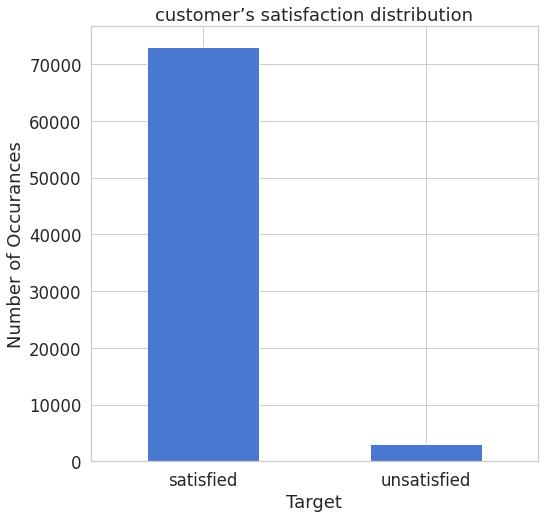

In [ ]:
#to plot the customer’s satisfaction distribution for Target Col
count_classes = pd.value_counts(df['TARGET'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("customer’s satisfaction distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Target")
plt.ylabel("Number of Occurances")

Data is highly unbalanced with only 4.416% belonging to class ‘1’ that is unsatisfied customers.

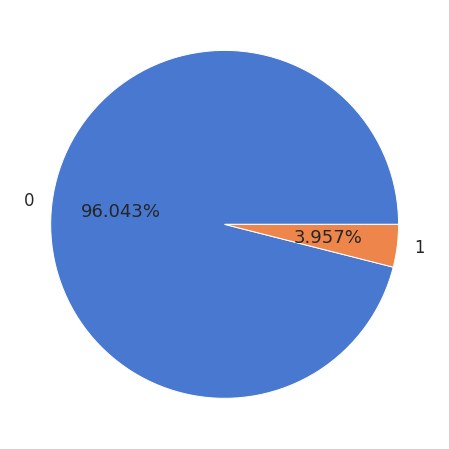

Number of Positive data points are: 3008  (3.957%)
Number of Negative data points are: 73012 (96.043%)


In [ ]:
zero= df['TARGET'].value_counts()[0]
one= df['TARGET'].value_counts()[1]
my_labels=[0,1]
plt.rcParams["figure.figsize"] = (8,8)

plt.pie([zero,one], labels= my_labels, autopct='%1.3f%%')
plt.show()

print("Number of Positive data points are: {}  ({:.3f}{})".format(one, one/(one+zero)*100, "%"))
print("Number of Negative data points are: {} ({:.3f}{})".format(zero, zero/(one+zero)*100, "%"))

In [ ]:
Y = df['TARGET'] # Dependent Feature: This column comprises of two classes "Satisfied" = Class 0 and "Unstaisfied" = Class 1 
X = df.drop('TARGET', axis=1) # Independent Features

In [ ]:
# We are Spliting  the dataset into train and test split in a ratio of 80:20
x_train, x_val, y_train, y_val = train_test_split(X, Y,
                                                  test_size = .2,
                                                  random_state=12)

In [ ]:
np.isnan(x_train.any()) #and gets False
# np.isfinite(mat.all()) #and gets True

ID                         False
var3                       False
var15                      False
imp_ent_var16_ult1         False
imp_op_var39_comer_ult1    False
                           ...  
saldo_medio_var44_hace2    False
saldo_medio_var44_hace3    False
saldo_medio_var44_ult1     False
saldo_medio_var44_ult3     False
var38                      False
Length: 370, dtype: bool

In [ ]:
x_train = x_train.reset_index()

In [ ]:
# Training  the RFC with the Training data (x_train and y_train)
clf_rf_no_sample = RandomForestClassifier()
clf_rf_no_sample.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# using the Accuracy Metric calculating the Accuracy
acc_no_sample = accuracy_score(y_val, clf_rf_no_sample.predict(x_val))
print(acc_no_sample*100 , '%')

95.7971586424625 %


Accuracy of the model is around 96% percent 

[[14555    58]
 [  581    10]]


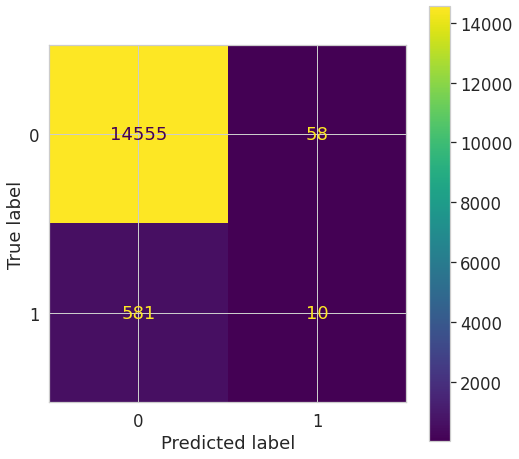

In [ ]:
# Evaluate the model further using Confusion matrix
cf_no_sample = confusion_matrix(y_val, clf_rf_no_sample.predict(x_val), labels=clf_rf_no_sample.classes_)
print(cf_no_sample)

disp = ConfusionMatrixDisplay(confusion_matrix=cf_no_sample,
                            display_labels=clf_rf_no_sample.classes_)
disp.plot()
plt.show()

here Target = 0 is Satisifed and Target = 1 is Unstisfied Cistomer, thus as we are trying to measure how much our model is able to predict

TN = True Normal Transaction = 14552

TP = True Fraud Transaction = 11

FP = False Fraud Transaction = 61

FN = False Normal Transaction = 576

In [ ]:
# Evaluate the model for Precision Score
from sklearn.metrics import precision_score
precision_score_no_sample = precision_score(y_val, clf_rf_no_sample.predict(x_val))
print(precision_score_no_sample * 100, '%')

14.705882352941178 %


In [ ]:
from sklearn.metrics import recall_score
recall_score_no_sample = recall_score(y_val, clf_rf_no_sample.predict(x_val))
print(recall_score_no_sample * 100, '%')

1.6920473773265652 %


In [ ]:
print("------No Sampling--------")
print('So, Accuracy = ' , acc_no_sample * 100, '%')
print('Precision score = ', precision_score_no_sample * 100, '%') 
print('Recall = ', recall_score_no_sample * 100, '%')

------No Sampling--------
So, Accuracy =  95.7971586424625 %
Precision score =  14.705882352941178 %
Recall =  1.6920473773265652 %


# Random Under Sampling Approach
Here we use the data but in an under sampling appraoch. We reduce the number of samples for majority class to match the number of samples in the minority class.

In [ ]:
df[df.TARGET == 0].shape # satisfied customer

(73012, 371)

In [ ]:
df[df.TARGET == 1].shape

(3008, 371)

In [ ]:
df.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

Text(0, 0.5, 'Number of Occurances')

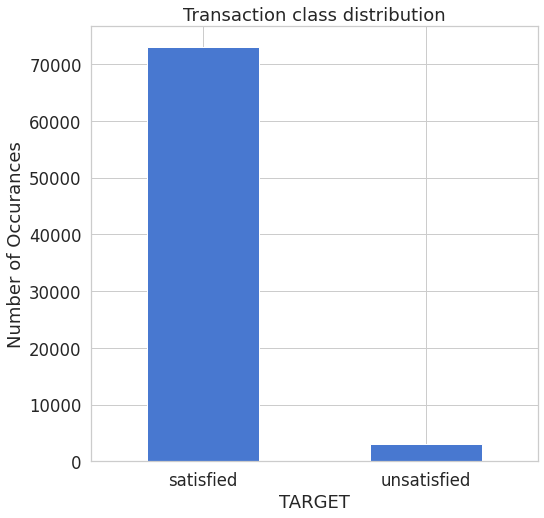

In [ ]:
count_classes = pd.value_counts(df['TARGET'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("TARGET")
plt.ylabel("Number of Occurances")

In [ ]:
count_class_0, count_class_1 = df.TARGET.value_counts()

# Divide classes in two dataframes
df_class_0 = df[df['TARGET'] == 0]
df_class_1 = df[df['TARGET'] == 1]

print(count_class_0, count_class_1)

73012 3008


In [ ]:
df_class_0 = df[df.TARGET == 0]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.TARGET.value_counts())

Random under-sampling:
0    3008
1    3008
Name: TARGET, dtype: int64


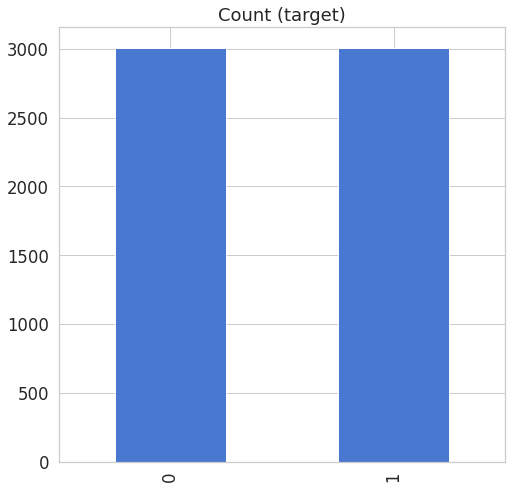

In [ ]:
df_test_under.TARGET.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
Y = df_test_under['TARGET'] # Dependent Feature: This column comprises of two classes "Fraud" = Class 1 and "Normal" = Class 0 Transactions
X = df_test_under.drop('TARGET', axis=1)

In [ ]:
# Split the dataset into train and test split having a ratio of 80:20
x_train_under, x_val_under, y_train_under, y_val_under = train_test_split(X, Y,
                                                  test_size = .2,
                                                  random_state=12)

In [ ]:
clf_rf_under_sample = RandomForestClassifier()
clf_rf_under_sample.fit(x_train_under, y_train_under)

RandomForestClassifier()

In [ ]:
acc_under_sample = accuracy_score(y_val_under, clf_rf_under_sample.predict(x_val_under))
print(acc_under_sample*100 , '%')

73.08970099667775 %


[[420 141]
 [183 460]]


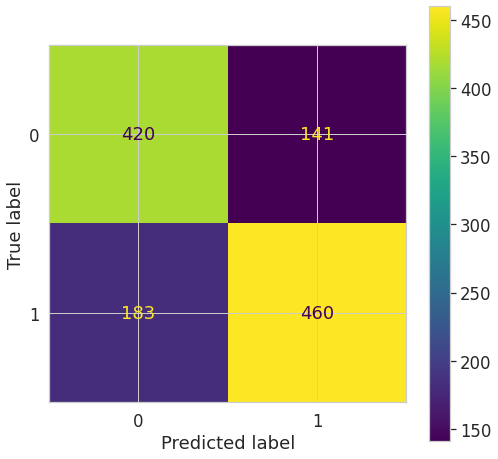

In [ ]:
cf_under_sample = confusion_matrix(y_val_under, clf_rf_under_sample.predict(x_val_under), labels=clf_rf_under_sample.classes_)
print(cf_under_sample)

disp = ConfusionMatrixDisplay(confusion_matrix=cf_under_sample,
                            display_labels=clf_rf_under_sample.classes_)
disp.plot()
plt.show()

here Target = 0 is Satisifed and Target = 1 is Unstisfied Cistomer, thus as we are trying to measure how much our model is able to predict

TN = True Normal Transaction = 14554

TP = True Fraud Transaction = 12

FP = False Fraud Transaction = 59

FN = False Normal Transaction = 579

In [ ]:
# Evaluate the model for Precision Score
from sklearn.metrics import precision_score
precision_score_under_sample = precision_score(y_val_under, clf_rf_under_sample.predict(x_val_under))
print(precision_score_under_sample * 100, '%')

# Evaluate the model for Recall Score
from sklearn.metrics import recall_score
recall_score_under_sample = recall_score(y_val, clf_rf_under_sample.predict(x_val))
print(recall_score_under_sample * 100, '%')

76.53910149750416 %
93.57021996615906 %


In [ ]:
print("------Under Sampling--------")
print('So, Accuracy = ' , acc_under_sample * 100, '%')
print('Precision score = ', precision_score_under_sample * 100, '%') 
print('Recall = ', recall_score_under_sample * 100, '%')

------Under Sampling--------
So, Accuracy =  73.08970099667775 %
Precision score =  76.53910149750416 %
Recall =  93.57021996615906 %


## Oversampling Approach using SMOTE
Now, We apply SMOTE on the minority class and we observe the changes that occur in the final predictions.

In [ ]:
df = pd.read_csv("InClass_santander_train.csv") 
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
Y = df['TARGET'] # Dependent Feature: This column comprises of two classes "Fraud" = Class 1 and "Normal" = Class 0 Transactions
X = df.drop('TARGET', axis=1) # Independent Features

In [ ]:
# Split the dataset into train and test split having a ratio of 80:20
x_train_over, x_val_over, y_train_over, y_val_over = train_test_split(X, Y,
                                                  test_size = .2,
                                                  random_state=12)

In [ ]:
# Perform Oversampling on the training dataset using SMOTE on the minority class (Fraud transaction)
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(x_train_over, y_train_over)
x_train_over = pd.DataFrame(x_train_res)
y_train_over = pd.DataFrame(y_train_res)

In [ ]:
# Concatenate the oversampled dataset and observe the class distribution in the sampled data
frames = (x_train_over,y_train_over)
dataset = pd.concat(frames)
dataset.TARGET.value_counts()

0.0    58399
1.0    58399
Name: TARGET, dtype: int64

Text(0, 0.5, 'Number of Occurances')

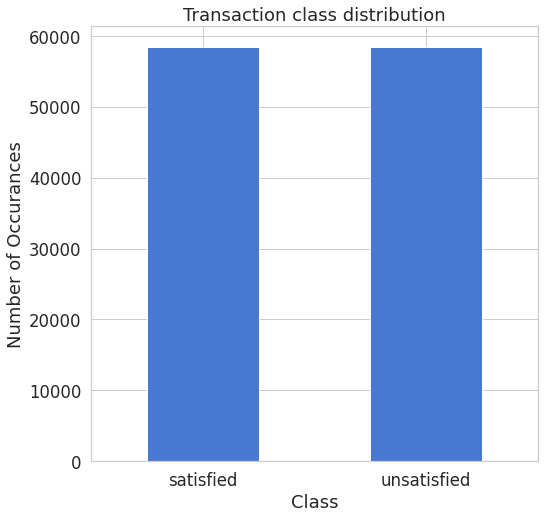

In [ ]:
# Plot the distribution of Transactions without balancing the data
count_classes = pd.value_counts(dataset['TARGET'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Number of Occurances")

In [ ]:
# Train the Random Forest Classifier with the Training data (x_train and y_train)
clf_rf_over_sample = RandomForestClassifier()
clf_rf_over_sample.fit(x_train_over, y_train_over)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [ ]:
# Evaluate the model performance using the Accuracy Metric
acc_over_sample = accuracy_score(y_val_over, clf_rf_over_sample.predict(x_val_over))
print(acc_over_sample * 100, '%')

93.8305709023941 %


Accuracy for Oversampling using SMOTE is 93.83% that is similar to the accuracy without balancing

But Let's see if we achieve something more from it. Let's look at confusion matrix.

[[14176   437]
 [  501    90]]


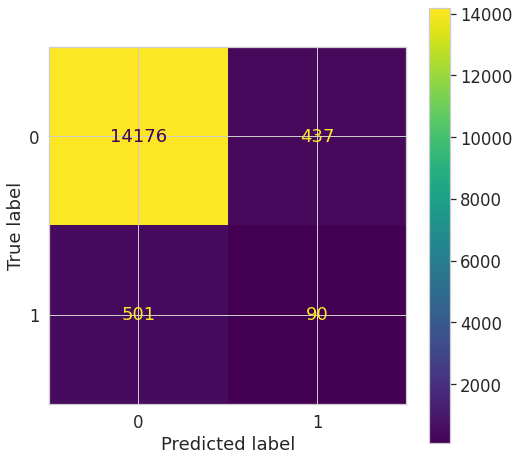

In [ ]:
# Evaluate the model further using Confusion matrix
cf_over_sample=confusion_matrix(y_val_over, clf_rf_over_sample.predict(x_val_over), labels=clf_rf_over_sample.classes_)
print(cf_over_sample)

disp = ConfusionMatrixDisplay(confusion_matrix=cf_over_sample,
                            display_labels=clf_rf_over_sample.classes_)
disp.plot()
plt.show()

here Target = 0 is Satisifed and Target = 1 is Unstisfied Cistomer, thus as we are trying to measure how much our model is able to predict

TN = True Normal Transaction = 14552

TP = True Fraud Transaction = 89

FP = False Fraud Transaction = 436

FN = False Normal Transaction = 502

In [ ]:
# Evaluate the model for Precision Score
from sklearn.metrics import precision_score
precision_score_over_sample = precision_score(y_val_over, clf_rf_over_sample.predict(x_val_over))
print(precision_score_over_sample*100, '%')

17.077798861480076 %


In [ ]:
# Evaluate the model for Recall Score
from sklearn.metrics import recall_score
recall_score_over_sample = recall_score(y_val_over, clf_rf_over_sample.predict(x_val_over))
print(recall_score_over_sample*100, '%')

15.228426395939088 %


In [ ]:
print("------Over Sampling--------")
print('So, Accuracy = ' , acc_over_sample*100, '%')
print('Precision score = ', precision_score_over_sample*100, '%') 
print('Recall = ', recall_score_over_sample*100, '%')

------Over Sampling--------
So, Accuracy =  93.8305709023941 %
Precision score =  17.077798861480076 %
Recall =  15.228426395939088 %


### Note: 
Balancing must be performed after the train, test split. However, for Under Sampling one must make sure that the percentage of the imbalance of the dataset present in original dataset MUST be present in the training dataset.